#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk

#### Read document

In [2]:
df= pd.read_csv('diabetes-2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Exploration & Cleaning

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### No missing values

In [8]:
df.duplicated().sum() #check for duplicates

0

In [9]:
#since its not possible for glucose to be zero we are replacing the zero values with mean of the glucose columns
df.Glucose=df.Glucose.replace(0,int(df.Glucose.mean()))

In [10]:
# since bloodpressure can not be zero we are filling the zero values with mean(Blood Pressure columns)
df.BloodPressure.replace(0,df.BloodPressure.mean(),inplace=True)

In [11]:
# since skinthickness cant be zero we replace the zero values with mean(skin thickness column)
df.SkinThickness.replace(0,df.SkinThickness.mean(),inplace=True)

In [12]:
df.Insulin.replace(0,df.Insulin.mean(),inplace=True)


In [13]:
df.BMI.replace(0,df.BMI.mean(),inplace=True)


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

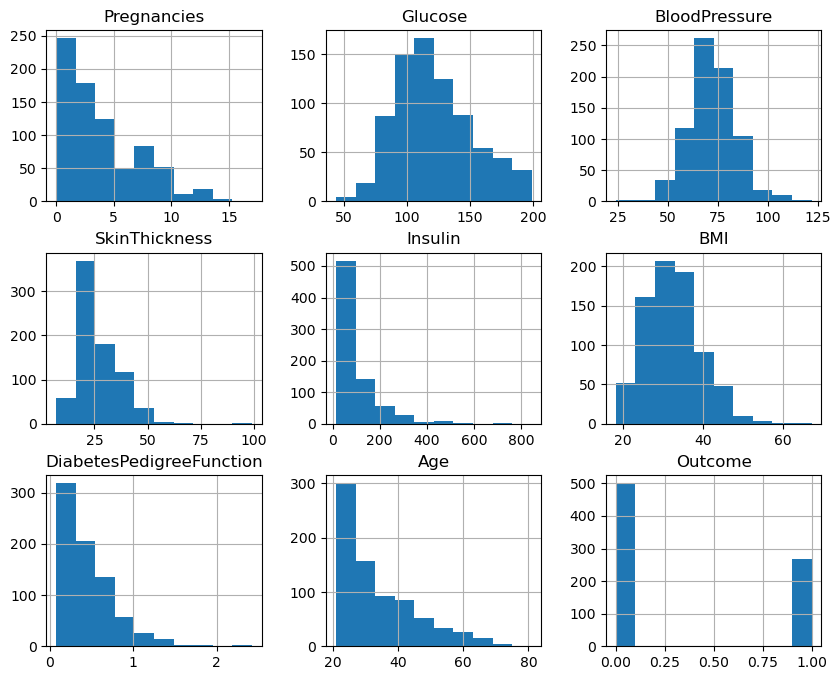

In [17]:
#Check distribution of the variables
df.hist(figsize=(10,8))

In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128022,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128022,1.000000,0.219738,0.160705,0.396697,0.231464,0.137158,0.266673,0.492884
BloodPressure,0.208984,0.219738,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160705,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396697,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231464,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137158,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266673,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492884,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


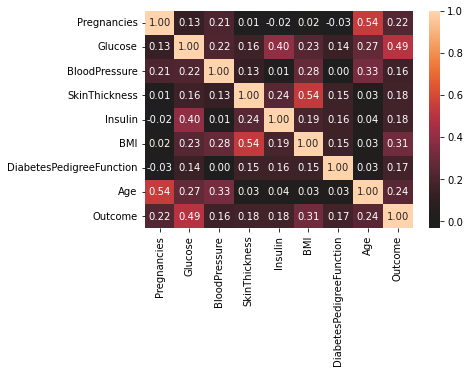

In [26]:
#Plot the correlation matrix for easier readability
sns.heatmap(df.corr(), annot = True, fmt = '.2f', center = 0);

<Axes: xlabel='Outcome', ylabel='Glucose'>

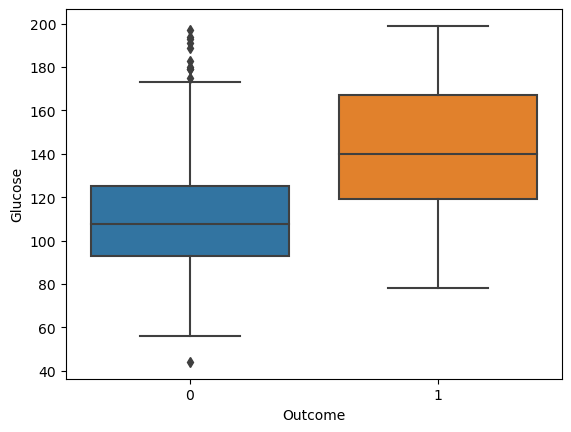

In [18]:
#Investigate the relationship between the Glucose and Outcome variables
sns.boxplot(x='Outcome', y='Glucose', data=df)

<Axes: xlabel='SkinThickness', ylabel='BMI'>

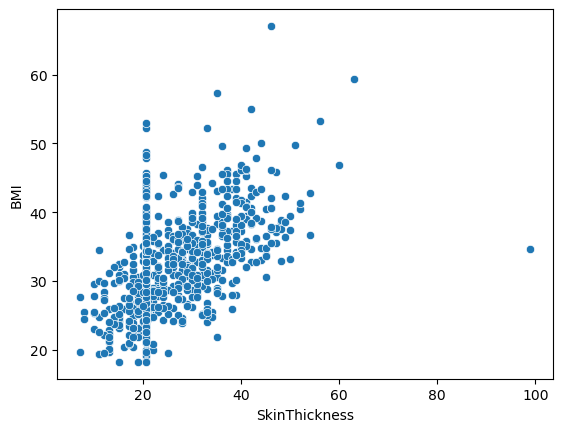

In [20]:
#Visualize the highest correlation in the heatmap which is 0.54 between SkinThickness and BMI variable
sns.scatterplot(x='SkinThickness', y='BMI', data=df)

<Axes: ylabel='count'>

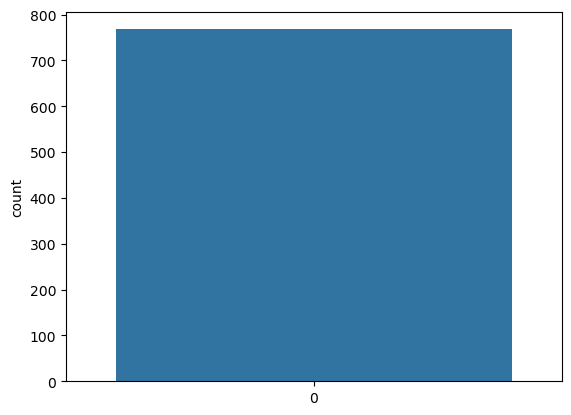

In [21]:
#Check the distribution of the target variable
sns.countplot(df.Outcome)


#### Separate the dependent variable and independent variable

In [27]:
#Extract the independent variables
X=df.drop(columns=["Outcome"])

In [28]:
#Extract the dependent variable
y=df["Outcome"]

### Split the Data 80/20

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

### Preprocessing for the Algorithms

In [30]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()

X_train=scal.fit_transform(X_train)
X_test=scal.fit_transform(X_test)

 > ### Logistic Regression

In [31]:
log_X_train = X_train.copy()
log_X_test = X_test.copy()
log_y_train= y_train.copy()
log_y_test =y_test.copy()

In [32]:
# create logistic regression object
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

# fit the model
clf.fit(log_X_train, log_y_train)

LogisticRegression(random_state=42)

In [33]:
# make predictions
log_y_pred = clf.predict(log_X_test)

In [34]:
# calculate accuracy and other metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
log_accuracy = clf.score(log_X_test, log_y_test)
log_precision= precision_score(log_y_test, log_y_pred)
log_recall= recall_score(log_y_test, log_y_pred)
log_f1_score= f1_score(log_y_test, log_y_pred)

print("Logistic Regression Accuracy: {:.2f}%".format(log_accuracy*100))
print("Logistic Regression Precison: {:.2f}%".format(log_precision*100))
print("Logistic Regression Recall: {:.2f}%".format(log_recall*100))
print("Logistic Regression F1_Score: {:.2f}%".format(log_f1_score*100))

Logistic Regression Accuracy: 77.27%
Logistic Regression Precison: 70.83%
Logistic Regression Recall: 61.82%
Logistic Regression F1_Score: 66.02%


In [35]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(log_y_test, log_y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



Logistic Regression Confusion Matrix 
 [[85 14]
 [21 34]]


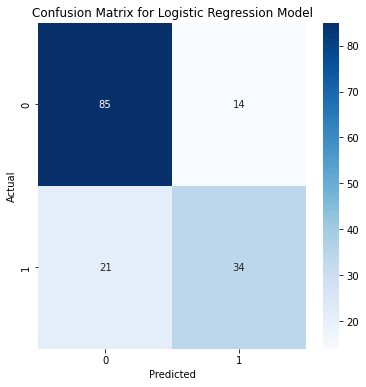

In [36]:
# create confusion matrix
log_cm = confusion_matrix(log_y_test, log_y_pred)
print('Logistic Regression Confusion Matrix \n', log_cm)

# plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(log_cm, annot=True, cmap='Blues', fmt= 'g')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Extract the values of the confusion matrix

In [37]:
log_tn, log_fp, log_fn, log_tp =log_cm.flatten()

#### Calculate the Sensitivity and Specificity

In [38]:
log_sensitivity = log_tp/(log_tp+log_fn)
log_specificity = log_tn/(log_tn+log_fp)
print('Logistic Regression Sensitivity: ',log_sensitivity)
print('Logistic Regression Specificity: ',log_specificity)

Logistic Regression Sensitivity:  0.6181818181818182
Logistic Regression Specificity:  0.8585858585858586


> ## KNN

In [39]:
knn_X_train = X_train.copy()
knn_X_test = X_test.copy()
knn_y_train= y_train.copy()
knn_y_test =y_test.copy()

In [41]:
#Create a classifier
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)

#Train the KNN classifier
knn.fit(knn_X_train, knn_y_train)

#Predict the Outcome
knn_y_pred = knn.predict(knn_X_test)

In [42]:
# calculate accuracy and other metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
knn_accuracy = accuracy_score(knn_y_test, knn_y_pred)
knn_precision= precision_score(knn_y_test, knn_y_pred)
knn_recall= recall_score(knn_y_test, knn_y_pred)
knn_f1_score= f1_score(knn_y_test, knn_y_pred)

print("KNN Accuracy: {:.2f}%".format(knn_accuracy*100))
print("KNN Precison: {:.2f}%".format(knn_precision*100))
print("KNN Recall: {:.2f}%".format(knn_recall*100))
print("KNN F1_Score: {:.2f}%".format(knn_f1_score*100))


KNN Accuracy: 70.13%
KNN Precison: 57.89%
KNN Recall: 60.00%
KNN F1_Score: 58.93%


In [43]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(knn_y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



KNN Confusion Matrix 
 [[75 24]
 [22 33]]


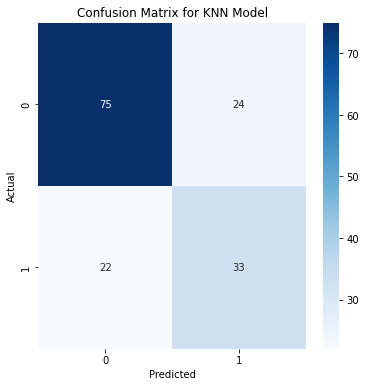

In [44]:
# create confusion matrix
knn_cm = confusion_matrix(knn_y_test, knn_y_pred)
print('KNN Confusion Matrix \n', knn_cm)

# plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt= 'g')
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Extract the values of the confusion matrix

In [45]:
knn_tn, knn_fp, knn_fn, knn_tp =knn_cm.flatten()

#### Calculate the Sensitivity and Specificity

In [46]:
knn_sensitivity = knn_tp/(knn_tp+knn_fn)
knn_specificity = knn_tn/(knn_tn+knn_fp)
print('KNN Sensitivity: ',knn_sensitivity)
print('KNN Specificity: ',knn_specificity)

KNN Sensitivity:  0.6
KNN Specificity:  0.7575757575757576


> ## Support Vector Machine (SVM)

In [47]:
#Copy the train and test data
svm_X_train = X_train.copy()
svm_X_test = X_test.copy()
svm_y_train= y_train.copy()
svm_y_test =y_test.copy()



In [48]:
#Create SVM classifier object
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)

#Train the Classifier
svm.fit(svm_X_train, svm_y_train)

#Make prediction
svm_y_pred =svm.predict(svm_X_test)

In [49]:
# calculate accuracy and other metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
svm_accuracy = accuracy_score(svm_y_test, svm_y_pred)
svm_precision= precision_score(svm_y_test, svm_y_pred)
svm_recall= recall_score(svm_y_test, svm_y_pred)
svm_f1_score= f1_score(svm_y_test, svm_y_pred)

print("SVM Accuracy: {:.2f}%".format(svm_accuracy*100))
print("SVM Precison: {:.2f}%".format(svm_precision*100))
print("SVM Recall: {:.2f}%".format(svm_recall*100))
print("SVM F1_Score: {:.2f}%".format(svm_f1_score*100))

SVM Accuracy: 77.27%
SVM Precison: 70.83%
SVM Recall: 61.82%
SVM F1_Score: 66.02%


In [50]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(svm_y_test, svm_y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



SVM Confusion Matrix 
 [[85 14]
 [21 34]]


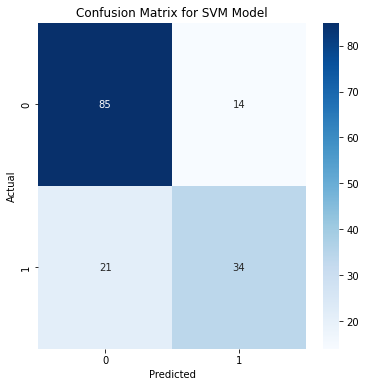

In [51]:
# create confusion matrix
svm_cm = confusion_matrix(svm_y_test, svm_y_pred)
print('SVM Confusion Matrix \n', svm_cm)

# plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt= 'g')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Extract the values of the confusion matrix

In [52]:
svm_tn, svm_fp, svm_fn, svm_tp =svm_cm.flatten()

#### Calculate the Sensitivity and Specificity

In [53]:
svm_sensitivity = svm_tp/(svm_tp+svm_fn)
svm_specificity = svm_tn/(svm_tn+svm_fp)
print('SVM Sensitivity: ',svm_sensitivity)
print('SVM Specificity: ',svm_specificity)

SVM Sensitivity:  0.6181818181818182
SVM Specificity:  0.8585858585858586


> ## Decision Trees

In [54]:
#Copy the train and test data
dt_X_train = X_train.copy()
dt_X_test = X_test.copy()
dt_y_train= y_train.copy()
dt_y_test =y_test.copy()

In [55]:
# create Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)

#fit the model
dt.fit(dt_X_train, dt_y_train)

#make predictions
dt_y_pred = dt.predict(dt_X_test)

In [56]:
# calculate accuracy and other metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
dt_accuracy = accuracy_score(dt_y_test, dt_y_pred)
dt_precision= precision_score(dt_y_test, dt_y_pred)
dt_recall= recall_score(dt_y_test, dt_y_pred)
dt_f1_score= f1_score(dt_y_test, dt_y_pred)

print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy*100))
print("Decison Tree Precison: {:.2f}%".format(dt_precision*100))
print("Decision Tree Recall: {:.2f}%".format(dt_recall*100))
print("Decision Tree F1_Score: {:.2f}%".format(dt_f1_score*100))

Decision Tree Accuracy: 71.43%
Decison Tree Precison: 60.78%
Decision Tree Recall: 56.36%
Decision Tree F1_Score: 58.49%


In [57]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(dt_y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        99
           1       0.61      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



Decision Tree Confusion Matrix 
 [[79 20]
 [24 31]]


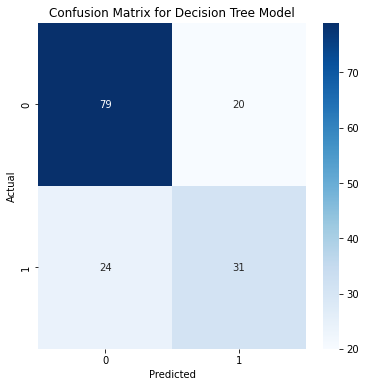

In [58]:
# create confusion matrix
dt_cm = confusion_matrix(dt_y_test, dt_y_pred)
print('Decision Tree Confusion Matrix \n', dt_cm)

# plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt= 'g')
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Extract the values of the confusion matrix

In [59]:
dt_tn, dt_fp, dt_fn, dt_tp =dt_cm.flatten()

#### Calculate the Sensitivity and Specificity

In [60]:
dt_sensitivity = dt_tp/(dt_tp+dt_fn)
dt_specificity = dt_tn/(dt_tn+dt_fp)
print('Decision Tree Sensitivity: ',dt_sensitivity)
print('Decision Tree Specificity: ',dt_specificity)

Decision Tree Sensitivity:  0.5636363636363636
Decision Tree Specificity:  0.797979797979798


> ## Random Forest Classification

In [61]:
#Copy the train and test data
rf_X_train = X_train.copy()
rf_X_test = X_test.copy()
rf_y_train= y_train.copy()
rf_y_test =y_test.copy()

In [62]:
# create a random forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=42)

#fit the model
rf.fit(rf_X_train, rf_y_train)

#make predictions
rf_y_pred = rf.predict(rf_X_test)

In [63]:
# calculate accuracy and other metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
rf_accuracy = accuracy_score(rf_y_test, rf_y_pred)
rf_precision= precision_score(rf_y_test, rf_y_pred)
rf_recall= recall_score(rf_y_test, rf_y_pred)
rf_f1_score= f1_score(rf_y_test, rf_y_pred)

print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy*100))
print("Random Forest Precison: {:.2f}%".format(rf_precision*100))
print("Random Forest Recall: {:.2f}%".format(rf_recall*100))
print("Random Forest F1_Score: {:.2f}%".format(rf_f1_score*100))

Random Forest Accuracy: 76.62%
Random Forest Precison: 69.39%
Random Forest Recall: 61.82%
Random Forest F1_Score: 65.38%


In [64]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(rf_y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



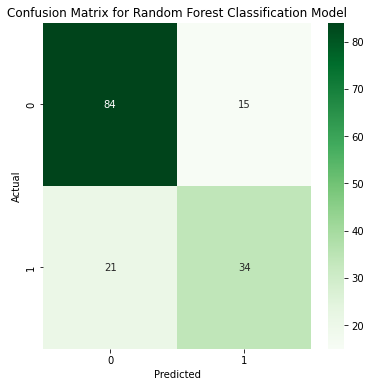

In [65]:
#create confusion matrix
rf_cm = confusion_matrix(rf_y_test, rf_y_pred)


#plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(rf_cm, annot=True, cmap= 'Greens', fmt= 'g')
plt.title('Confusion Matrix for Random Forest Classification Model')
plt.xlabel('Predicted')
plt.ylabel('Actual');

#### Extract the values of the confusion matrix

In [66]:
rf_tn, rf_fp, rf_fn, rf_tp =rf_cm.flatten()

#### Calculate the Sensitivity and Specificity

In [67]:
rf_tn, rf_fp, rf_fn, rf_tp =rf_cm.flatten()

rf_sensitivity = rf_tp/(rf_tp+rf_fn)
rf_specificity = rf_tn/(rf_tn+rf_fp)
print('Random Forest Sensitivity: ',rf_sensitivity)
print('Random Forest Specificity: ',rf_specificity)

Random Forest Sensitivity:  0.6181818181818182
Random Forest Specificity:  0.8484848484848485


## Compare the Models

In [68]:
#Create lists of metrics
Models =['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
Sensitivity =[log_sensitivity, knn_sensitivity, svm_sensitivity, dt_sensitivity, rf_sensitivity]
Specificity =[log_specificity, knn_specificity, svm_specificity, dt_specificity, rf_specificity]
Precision =[log_precision, knn_precision, svm_precision, dt_precision, rf_precision]
Accuracy =[log_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]
F1_score =[log_f1_score, knn_f1_score, svm_f1_score, dt_f1_score, rf_f1_score]

In [69]:
pd.DataFrame({'Models': Models, 'Sensitivity/Recall':Sensitivity, 'Specificity': Specificity, 'Precision': Precision,
              'Accuracy': Accuracy, 'F1_Score': F1_score})

,Models,Sensitivity/Recall,Specificity,Precision,Accuracy,F1_Score
0,Logistic Regression,0.618182,0.858586,0.708333,0.772727,0.660194
1,KNN,0.600000,0.757576,0.578947,0.701299,0.589286
2,SVM,0.618182,0.858586,0.708333,0.772727,0.660194
3,Decision Tree,0.563636,0.797980,0.607843,0.714286,0.584906
4,Random Forest,0.618182,0.848485,0.693878,0.766234,0.653846


>>## Based on the above output, Logistic Regression is the best model since it has the highest values across all metrics